 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
ls

BTC_price - Sheet1.csv        sp_tsx_history.csv
ETHUSD_price - Sheet1.csv     whale_analysis.ipynb
TSLA_stockprice - Sheet1.csv  whale_returns.csv
algo_returns.csv


In [3]:
df_algo = pd.read_csv('algo_returns.csv', index_col = 'Date',infer_datetime_format=True,parse_dates=True)
df_sp = pd.read_csv('sp_tsx_history.csv', index_col = 'Date', infer_datetime_format=True,parse_dates=True)
df_whale = pd.read_csv('whale_returns.csv', index_col = 'Date',infer_datetime_format=True,parse_dates=True)

In [4]:
# Reading whale returns
df_whale

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [5]:
# Count nulls
df_whale.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [6]:
df_whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls
df_whale.shape

(1060, 4)

In [8]:
#len(df_whale['SOROS FUND MANAGEMENT LLC'].dropna())

In [9]:
df_whale=df_whale.dropna()

In [10]:
df_whale.shape

(1059, 4)

In [11]:
df_whale.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
2015-03-09,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [12]:
df_whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [13]:
# Reading algorithmic returns
df_algo

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [14]:
# Count nulls
df_algo.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [15]:
df_algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [16]:
df_algo.shape

(1241, 2)

In [17]:
# Drop nulls
df_algo=df_algo.dropna()

In [18]:
df_algo.shape

(1235, 2)

In [19]:
df_algo.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [20]:
# Reading S&P TSX 60 Closing Prices
df_sp

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [21]:
#df_sp=df_sp.set_index('Date')

In [22]:
# Check Data Types

In [23]:
df_sp.dtypes

Close    object
dtype: object

In [24]:
# Fix Data Types
df_sp['Close'] = df_sp['Close'].str.replace(',', '').str.replace('$', '')

/var/folders/1z/zl3xctrs405bvlcjxg8l94000000gn/T/ipykernel_4043/4113288265.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sp['Close'] = df_sp['Close'].str.replace(',', '').str.replace('$', '')


In [25]:
df_sp

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [26]:
df_sp.dtypes

Close    object
dtype: object

In [27]:
df_sp['Close']=df_sp['Close'].str.replace(' ','')

In [28]:
df_sp['Close'] = df_sp['Close'].astype('float')

In [29]:
df_sp.dtypes

Close    float64
dtype: object

In [30]:
df_sp.isnull().sum()

Close    0
dtype: int64

In [31]:
df_sp=df_sp.pct_change()

In [32]:
df_sp.dropna(inplace=True)

In [33]:
df_sp

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [34]:
# Drop nulls
df_sp.dropna(inplace=True)

In [35]:
df_sp.shape

(1817, 1)

In [36]:
# Rename `Close` Column to be specific to this portfolio.
df_sp.rename(columns = {"Close":"sp500"}, inplace = True)

In [37]:
df_sp

,sp500
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [38]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.


In [39]:
df_combined = pd.concat([df_whale, df_algo, df_sp], axis = "columns",join = "inner")

In [40]:
df_combined

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

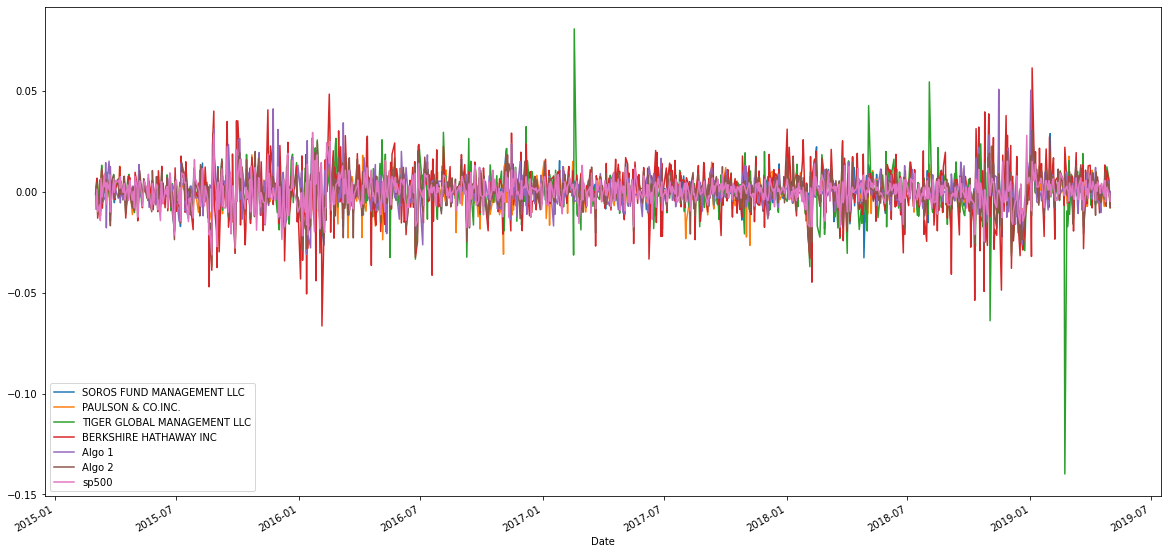

In [41]:
# Plot daily returns of all portfolios
df_combined.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

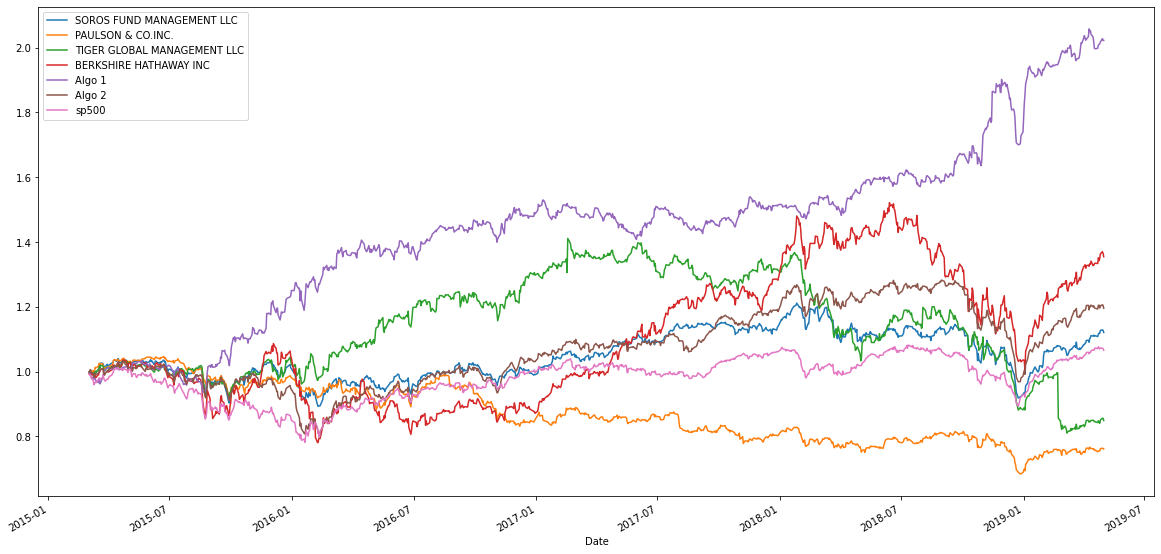

In [42]:
# Calculate cumulative returns of all portfolios
df_cum = (1+ df_combined).cumprod()

# Plot cumulative returns
df_cum.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

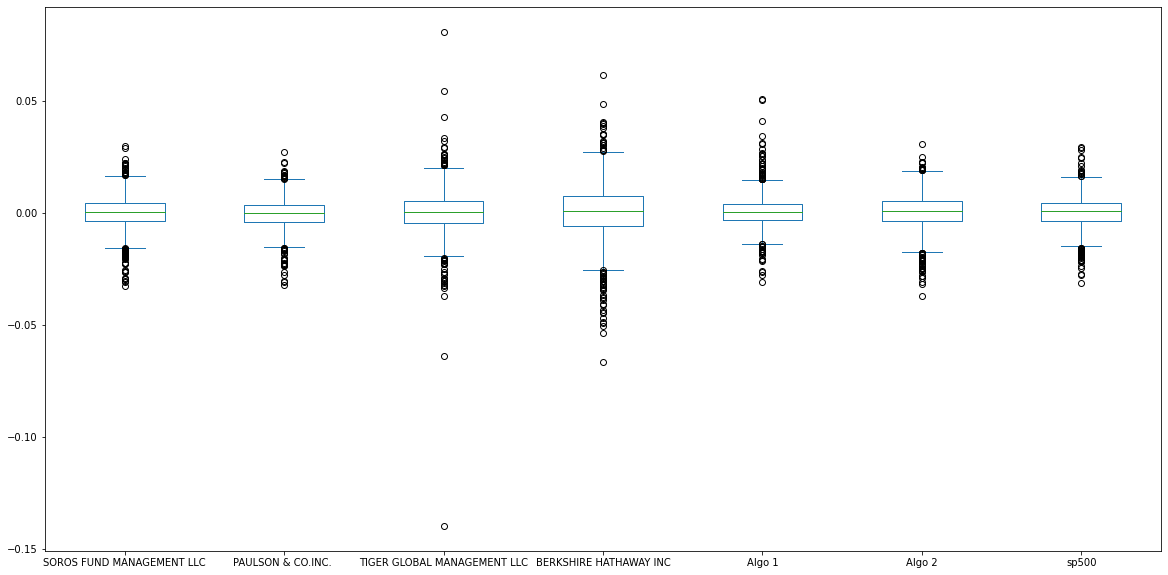

In [43]:
# Box plot to visually show risk
df_combined.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [44]:
# Calculate the daily standard deviations of all portfolios
df_combined_std = pd.DataFrame(df_combined.std()).rename(columns = {0:"std"})
df_combined_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
sp500,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [45]:
# Calculate  the daily standard deviation of S&P TSX 60
higher_std = df_combined_std[df_combined_std["std"] > df_combined_std.loc["sp500", "std"]]
higher_std
# Determine which portfolios are riskier than the S&P TSX 60
higher_std = df_combined_std[df_combined_std["std"] > df_combined_std.loc["sp500", "std"]]
higher_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


### Calculate the Annualized Standard Deviation

In [46]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = df_combined_std*np.sqrt(252)
df_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
sp500,0.111664


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

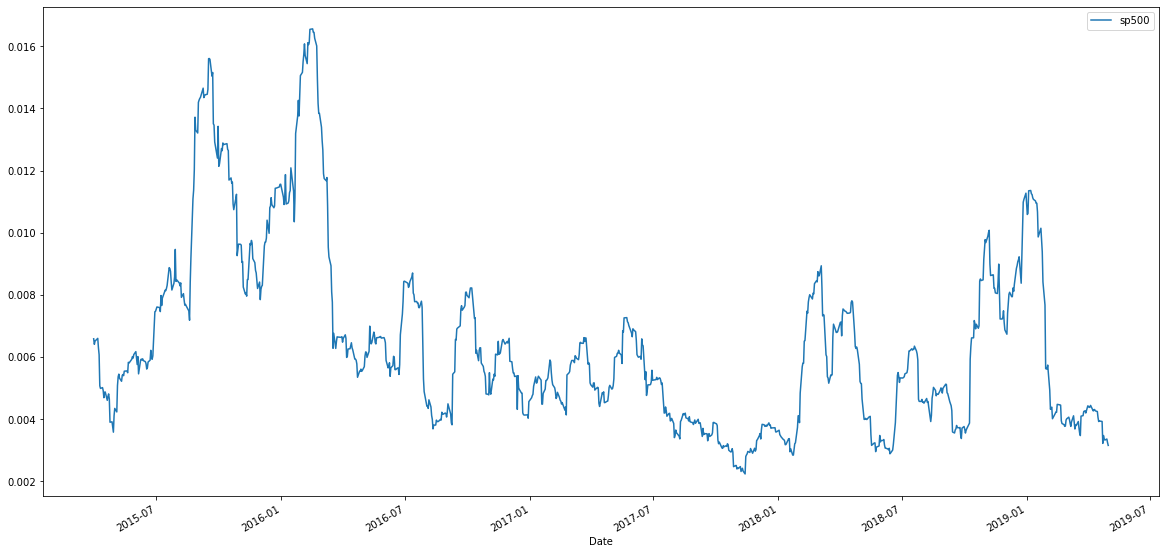

In [47]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp_rolling_21 = df_combined[["sp500"]].rolling(window = 21).std()

# Plot the rolling standard deviation
sp_rolling_21.plot(figsize = (20,10))

### Calculate and plot the correlation

In [48]:
# Calculate the correlation
correlation_sp500 = pd.DataFrame(df_combined.corr()).loc[:,"sp500"]
correlation_sp500[correlation_sp500==correlation_sp500[correlation_sp500<1].max()]

Algo 2    0.73737
Name: sp500, dtype: float64

In [49]:
# Display de correlation matrix

<AxesSubplot:xlabel='sp500', ylabel='Algo 2'>

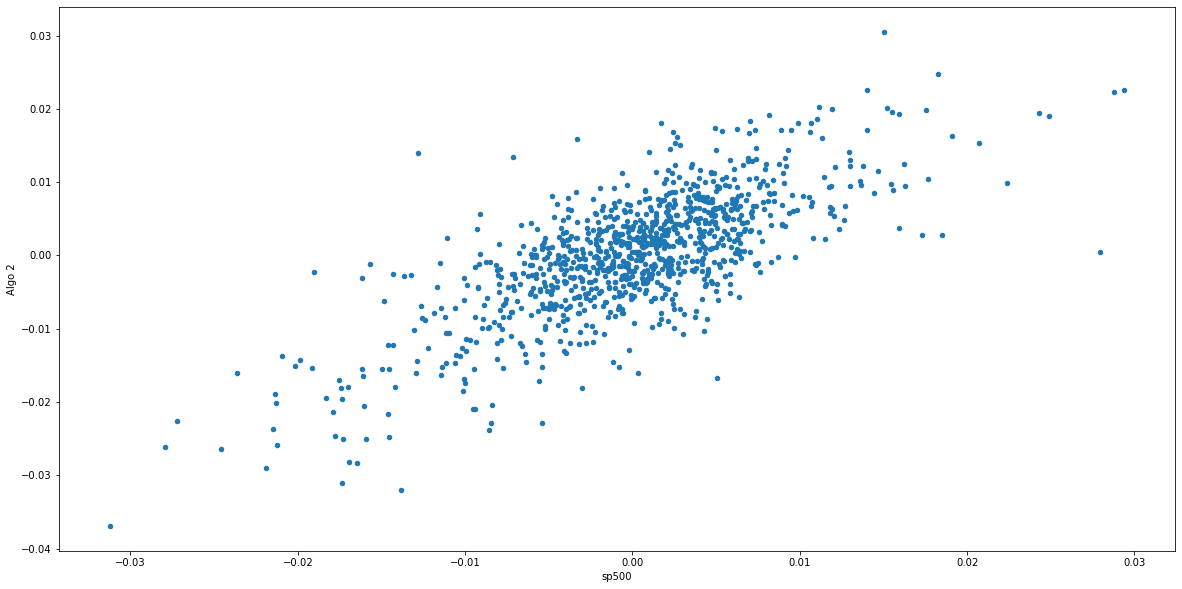

In [50]:
df_combined.plot(kind="scatter", y = "Algo 2", x = "sp500", figsize = (20,10))

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BH'}, xlabel='Date'>

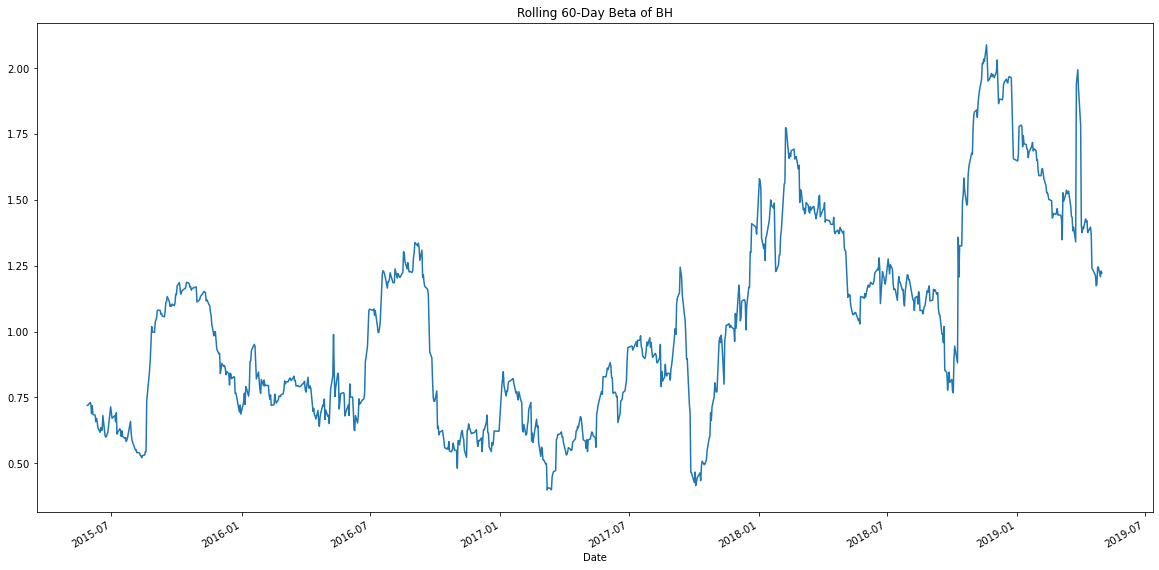

In [51]:
# Calculate covariance of a single portfolio
covariance = df_combined['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_combined['sp500'])
# Calculate variance of S&P TSX
variance = df_combined['sp500'].rolling(window=60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

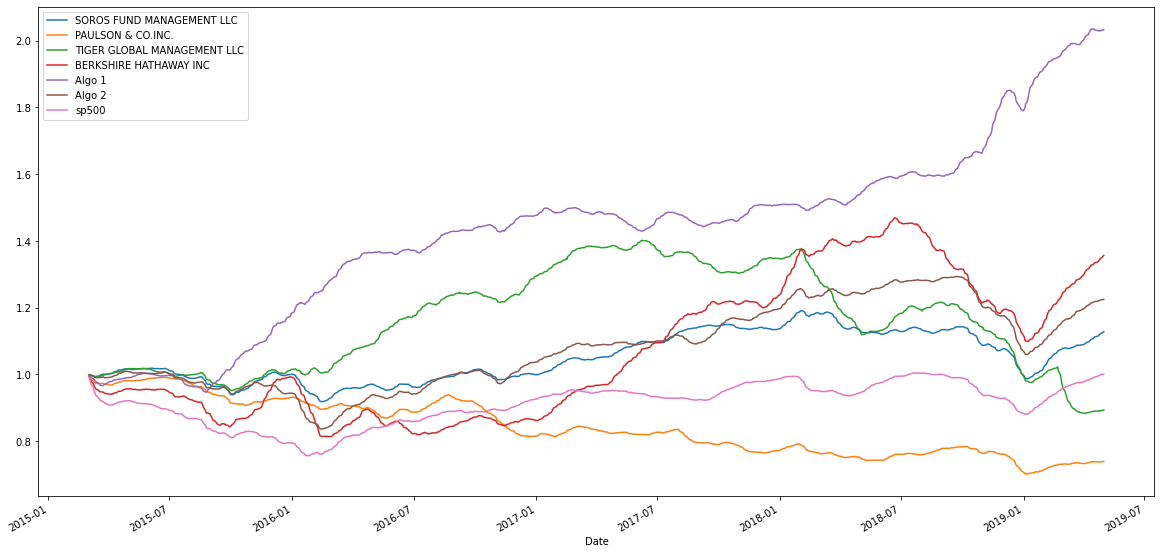

In [52]:
# Use `ewm` to calculate the rolling window
df_combined_ewm = df_combined.ewm(span = 21,adjust = False).mean()
(1+df_combined_ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [53]:
# Annualized Sharpe Ratios
sharpe_ratios = df_combined.mean()*252/(df_combined.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
sp500                          0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

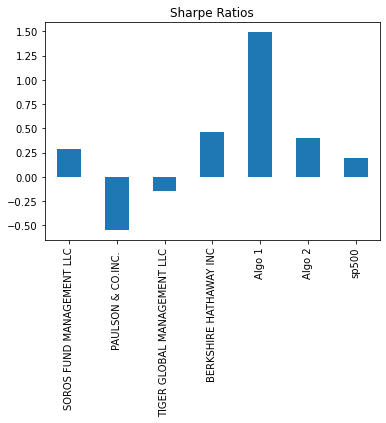

In [54]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

# The Algo 1 strategy outperformed all other portfolios, and ranked number 1; The Algo 2 strategy ranked number three and very close to Berkshire Hathaway's strategy. ---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [55]:
# Reading data from 1st, 2nd and 3rd stocks

In [100]:
ls

API class.ipynb                   Untitled1.ipynb
Apple_stockprice - Sheet1.csv     Untitled2.ipynb
BTC_price - Sheet1.csv            algo_returns.csv
ETHUSD_price - Sheet1.csv         sp_tsx_history.csv
NVDA_stockprice - Sheet1 (1).csv  whale_analysis.ipynb
TSLA_stockprice - Sheet1.csv      whale_returns.csv
Untitled.ipynb


In [102]:
aapl = pd.read_csv('Apple_stockprice - Sheet1.csv', index_col = 'Date',infer_datetime_format=True,parse_dates=True)
tsla = pd.read_csv('TSLA_stockprice - Sheet1.csv', index_col = 'Date',infer_datetime_format=True,parse_dates=True)
nvda = pd.read_csv('NVDA_stockprice - Sheet1 (1).csv', index_col = 'Date',infer_datetime_format=True,parse_dates=True)

In [103]:
aapl.rename(columns = {"Close":"aapl"}, inplace = True)
tsla.rename(columns = {"Close":"tsla"}, inplace = True)
nvda.rename(columns = {"Close":"nvda"}, inplace = True)

In [116]:
aapl.head()

,aapl
Date,
2018-01-02 16:00:00,43.07
2018-01-03 16:00:00,43.06
2018-01-04 16:00:00,43.26
2018-01-05 16:00:00,43.75
2018-01-08 16:00:00,43.59


In [117]:
tsla.head()

,tsla
Date,
2018-01-02 16:00:00,64.11
2018-01-03 16:00:00,63.45
2018-01-04 16:00:00,62.92
2018-01-05 16:00:00,63.32
2018-01-08 16:00:00,67.28


In [118]:
nvda.head()

,nvda
Date,
2018-01-02 16:00:00,49.84
2018-01-03 16:00:00,53.12
2018-01-04 16:00:00,53.40
2018-01-05 16:00:00,53.85
2018-01-08 16:00:00,55.50


In [94]:
# Combine all stocks in a single DataFrame

In [95]:
# stocks = pd.concat([btc, eth, tsla], axis = 1, join= "inner")

In [107]:
stocks = pd.concat([aapl, nvda, tsla], axis="columns",join="inner")

In [110]:
stocks.head()

,aapl,nvda,tsla
Date,,,
2018-01-02 16:00:00,43.07,49.84,64.11
2018-01-03 16:00:00,43.06,53.12,63.45
2018-01-04 16:00:00,43.26,53.40,62.92
2018-01-05 16:00:00,43.75,53.85,63.32
2018-01-08 16:00:00,43.59,55.50,67.28


In [109]:
stocks.dtypes

aapl    float64
nvda    float64
tsla    float64
dtype: object

In [111]:
# Reset Date index
stocks.index = stocks.index.normalize()

In [113]:
# Reorganize portfolio data by having a column per symbol
stocks.head()

,aapl,nvda,tsla
Date,,,
2018-01-02,43.07,49.84,64.11
2018-01-03,43.06,53.12,63.45
2018-01-04,43.26,53.40,62.92
2018-01-05,43.75,53.85,63.32
2018-01-08,43.59,55.50,67.28


In [114]:
# Calculate daily returns
weights = [1/3, 1/3, 1/3]
portfolio = stocks.dot(weights)
portfolio_returns = portfolio.pct_change()

# Drop NAs
portfolio_returns.dropna(inplace = True)
# Display sample data
portfolio_returns

Date
2018-01-03    0.016622
2018-01-04   -0.000313
2018-01-05    0.008397
2018-01-08    0.033868
2018-01-09   -0.003366
                ...   
2019-12-23    0.017693
2019-12-24    0.005733
2019-12-26    0.012466
2019-12-27   -0.003296
2019-12-30   -0.017681
Length: 501, dtype: float64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [119]:
# Set weights
weights = [1/3, 1/3, 1/3]
portfolio = stocks.dot(weights)

# Calculate portfolio return
portfolio_returns = portfolio.pct_change()
# Display sample data
portfolio_returns

Date
2018-01-02         NaN
2018-01-03    0.016622
2018-01-04   -0.000313
2018-01-05    0.008397
2018-01-08    0.033868
                ...   
2019-12-23    0.017693
2019-12-24    0.005733
2019-12-26    0.012466
2019-12-27   -0.003296
2019-12-30   -0.017681
Length: 502, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [123]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns = pd.concat((portfolio_returns,df_combined), axis = 1, join = "inner")
all_portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
all_portfolio_returns.head()

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,,
2018-01-02,NaN,0.014546,0.015045,-0.004784,0.031017,0.001254,0.017222,0.006222
2018-01-03,0.016622,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,-0.000313,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,0.008397,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.033868,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944


In [124]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns.dropna(inplace=True)
all_portfolio_returns.head()

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,,
2018-01-03,0.016622,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,-0.000313,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,0.008397,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.033868,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.003366,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [126]:
# Calculate the annualized `std`
portfolio_std = pd.DataFrame(all_portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std
# My portfolio is the riskiest

,std
my_portfolio,0.021314
SOROS FUND MANAGEMENT LLC,0.009177
PAULSON & CO.INC.,0.007203
TIGER GLOBAL MANAGEMENT LLC,0.013848
BERKSHIRE HATHAWAY INC,0.014328
Algo 1,0.007561
Algo 2,0.008672
sp500,0.006244


### Calculate and plot rolling `std` with 21-day window

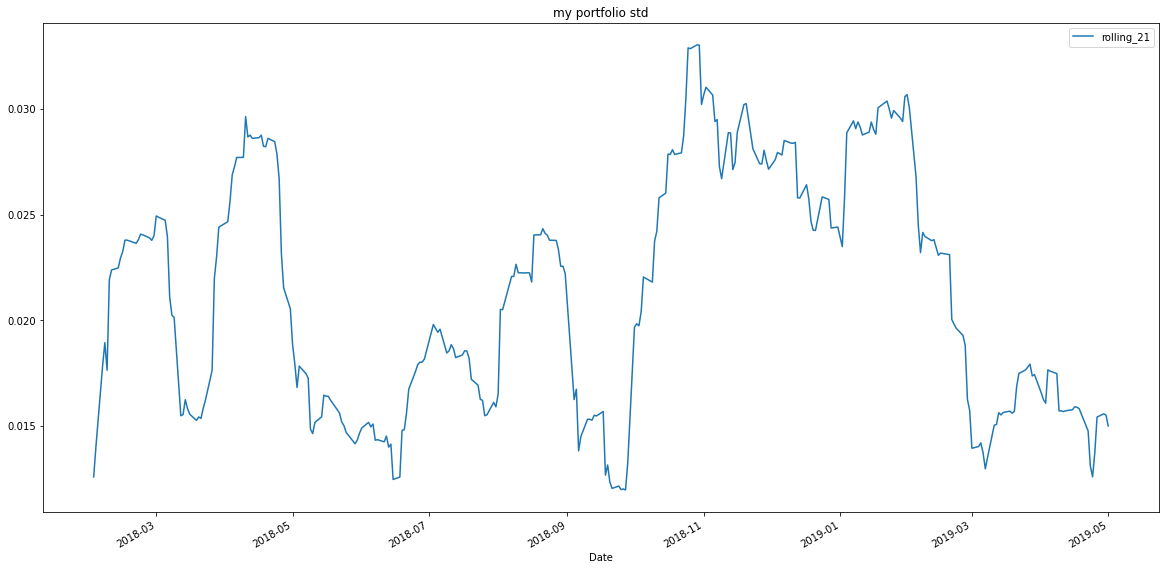

In [129]:
# Calculate rolling standard deviation
my_portfolio_rolling_21 = all_portfolio_returns[["my_portfolio"]].rolling(window = 21).std()
# Plot rolling standard deviation
ax = my_portfolio_rolling_21.plot(figsize = (20,10), title = 'my portfolio std')

ax.legend(['rolling_21'])



### Calculate and plot the correlation

In [130]:
# Calculate and plot the correlation
correlation_my_portfolio = all_portfolio_returns.corr().loc[:,"my_portfolio"]
correlation_my_portfolio[
    correlation_my_portfolio==correlation_my_portfolio[correlation_my_portfolio<1].max()]

BERKSHIRE HATHAWAY INC    0.684756
Name: my_portfolio, dtype: float64

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BH'}, xlabel='Date'>

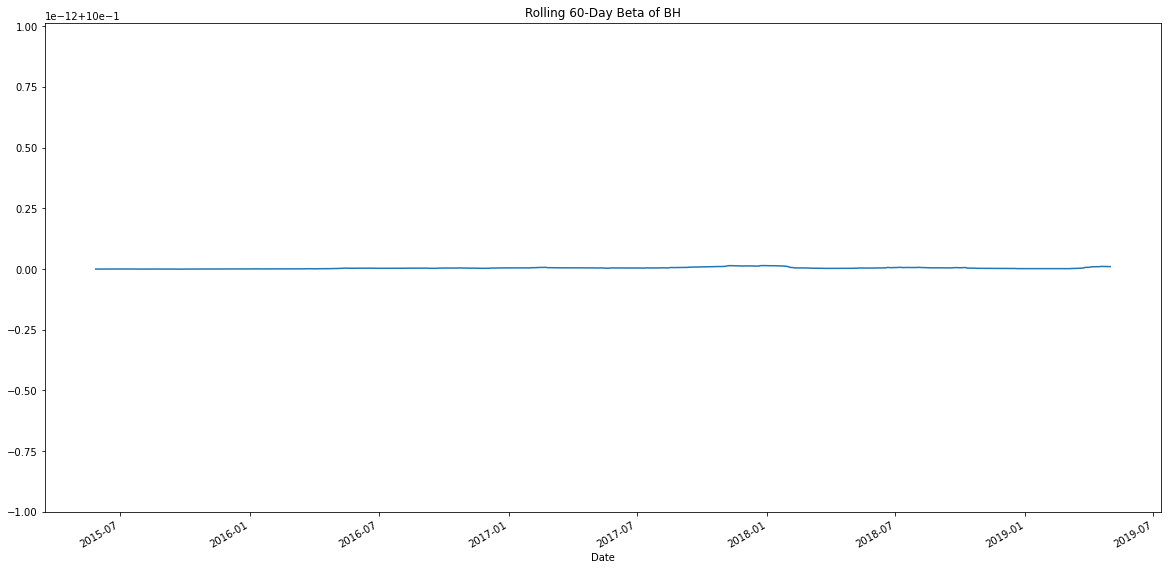

In [137]:
# Calculate and plot Beta
covariance = df_combined['sp500'].rolling(window=60).cov(df_combined['sp500'])
# Calculate variance of S&P TSX
variance = df_combined['sp500'].rolling(window=60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [138]:
# Calculate Annualized Sharpe Ratios
trading_days = all_portfolio_returns.count()
sharpe_ratios = all_portfolio_returns.mean()*trading_days/(all_portfolio_returns.std()*np.sqrt(trading_days))

<AxesSubplot:title={'center':'sharpe ratios'}>

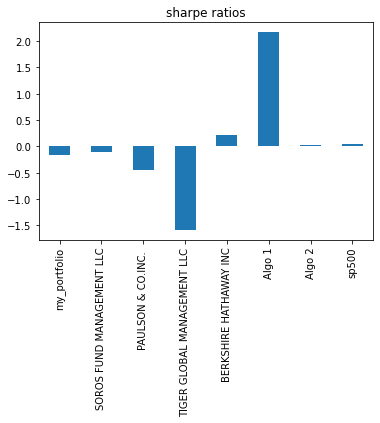

In [139]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
# My portfolio's performance was behind that of Algo1, Algo 2, BHI, and the SP500.